In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Load the breast_cancer Data from Sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [3]:
# Check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [4]:
# note: It is a Bunch object
# ? this Bunch basically act like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# ? 'data' means input data (X)
data.data.shape

(569, 30)

In [6]:
# ? 'target' means output data (y)
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# 'target' names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.target.shape

(569,)

In [9]:
# Meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
# Scaling the input dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# TensorFlow Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 0.6682 - accuracy: 0.6588 - val_loss: 0.5483 - val_accuracy: 0.7181
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6218 - accuracy: 0.6877 - val_loss: 0.5014 - val_accuracy: 0.7500
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.7113 - val_loss: 0.4604 - val_accuracy: 0.7872
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5430 - accuracy: 0.7349 - val_loss: 0.4242 - val_accuracy: 0.8245
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5090 - accuracy: 0.7612 - val_loss: 0.3932 - val_accuracy: 0.8511
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.7769 - val_loss: 0.3651 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4535 - accuracy: 0.7927 - val_loss: 0.3413 - val_accuracy: 0.8723
Epoch 8/100


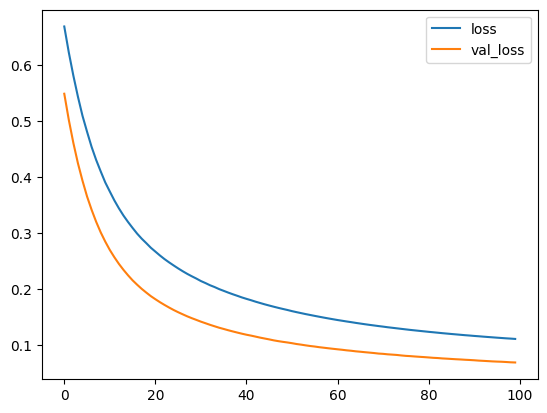

In [14]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

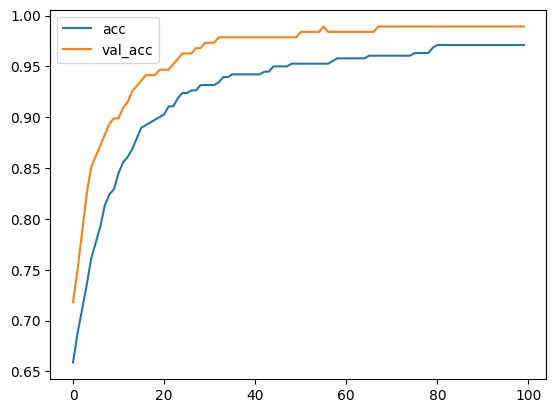

In [15]:
# Plot the accuracy of the model
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()